### 📘 Analysis of High School Exam Scores (2022-2024)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Load data

In [2]:
df_22=pd.read_csv('diem_thi_thpt_2022.csv')
df_23=pd.read_csv('diem_thi_thpt_2023.csv')
df_24=pd.read_csv('diem_thi_thpt_2024.csv')

### 2. Data cleaning

In [3]:
df_22.sort_values(by='sbd').head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25
2,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75
3,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50
4,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25


In [4]:
df_23.sort_values(by='sbd').head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,NaN,NaN,NaN,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,NaN,NaN,NaN,8.75,6.50,8.50,N1
2,1000003,NaN,6.50,NaN,NaN,NaN,NaN,9.25,7.50,NaN,NaN
3,1000004,7.8,8.25,7.8,NaN,NaN,NaN,4.50,6.25,8.25,N1
4,1000005,7.2,8.00,7.8,NaN,NaN,NaN,4.75,6.75,8.25,N1


In [5]:
df_24.sort_values(by='sbd').head()

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,6.75,8.0,6.0,5.25,5.0,NaN,NaN,NaN,N1
1,1000002,8.6,8.50,7.2,NaN,NaN,NaN,7.25,6.00,8.00,N1
2,1000003,8.2,8.75,8.2,NaN,NaN,NaN,7.25,7.25,8.75,N1
3,1000004,4.8,8.50,7.4,NaN,NaN,NaN,7.00,6.00,7.50,N1
4,1000005,8.6,9.00,7.8,NaN,NaN,NaN,9.00,8.75,8.50,N1


In [6]:
df_22['ma_ngoai_ngu']='none'

In [7]:
df_22['year']='2022'
df_23['year']='2023'
df_24['year']='2024'

In [8]:
df_22.head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,none,2022
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,none,2022


In [9]:
df_data_all=(pd.concat([df_22,df_23,df_24],ignore_index=True))

In [10]:
df_data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079106 entries, 0 to 3079105
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sbd           int64  
 1   toan          float64
 2   ngu_van       float64
 3   ngoai_ngu     float64
 4   vat_li        float64
 5   hoa_hoc       float64
 6   sinh_hoc      float64
 7   lich_su       float64
 8   dia_li        float64
 9   gdcd          float64
 10  ma_ngoai_ngu  object 
 11  year          object 
dtypes: float64(9), int64(1), object(2)
memory usage: 281.9+ MB


In [11]:
df_data_all['year'].unique()

array(['2022', '2023', '2024'], dtype=object)

In [12]:
data=df_data_all

In [13]:
students_per_year=data['year'].value_counts().sort_index()

In [14]:
growth_rate=students_per_year.pct_change() * 100

In [15]:
students_growth_df = pd.DataFrame({
    'so_luong_thi_sinh': students_per_year,
    'ty_le_tang_truong': growth_rate
}).reset_index().rename(columns={'index': 'year'})


In [16]:
students_growth_df

,year,so_luong_thi_sinh,ty_le_tang_truong
0,2022,995441,NaN
1,2023,1022060,2.674091
2,2024,1061605,3.869147


### 3. Analyst

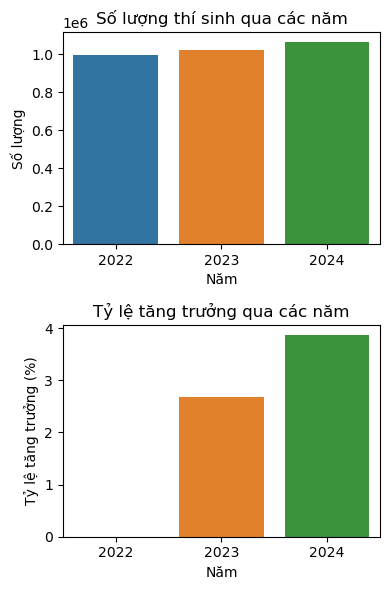

In [17]:
fig,axes = plt.subplots(2,1,figsize=(4,6))

sns.barplot(
    data=students_growth_df,
    x='year',
    y='so_luong_thi_sinh',
    ax=axes[0]
)
axes[0].set_title('Số lượng thí sinh qua các năm')
axes[0].set_xlabel('Năm')
axes[0].set_ylabel('Số lượng')


sns.barplot(
    data=students_growth_df,
    x='year',
    y='ty_le_tang_truong',
    ax=axes[1]
)
axes[1].set_title('Tỷ lệ tăng trưởng qua các năm')
axes[1].set_ylabel('Tỷ lệ tăng trưởng (%)')
axes[1].set_xlabel('Năm')
plt.tight_layout()
plt.show()

### Score distribution over years

In [18]:
data.head(2)

,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd,ma_ngoai_ngu,year
0,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,none,2022
1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,none,2022


In [19]:
data['year']=pd.to_numeric(data.year)

In [20]:
subjects=['toan','ngu_van','ngoai_ngu','vat_li','hoa_hoc','sinh_hoc','lich_su','dia_li','gdcd']
mean_score_by_year=data.groupby('year')[subjects].mean().reset_index()

In [21]:
mean_score_by_year

,year,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_li,gdcd
0,2022,6.466254,6.507746,5.157686,6.723779,6.703898,5.019109,6.343930,6.677929,8.033266
1,2023,6.250557,6.858194,5.462410,6.573900,6.744646,6.394933,6.025629,6.147523,8.285805
2,2024,6.447309,7.231146,5.521938,6.666866,6.680830,6.284079,6.570343,7.193541,8.156503


### Average score for each subject over the years

In [22]:
x_year=[2022,2023,2024]

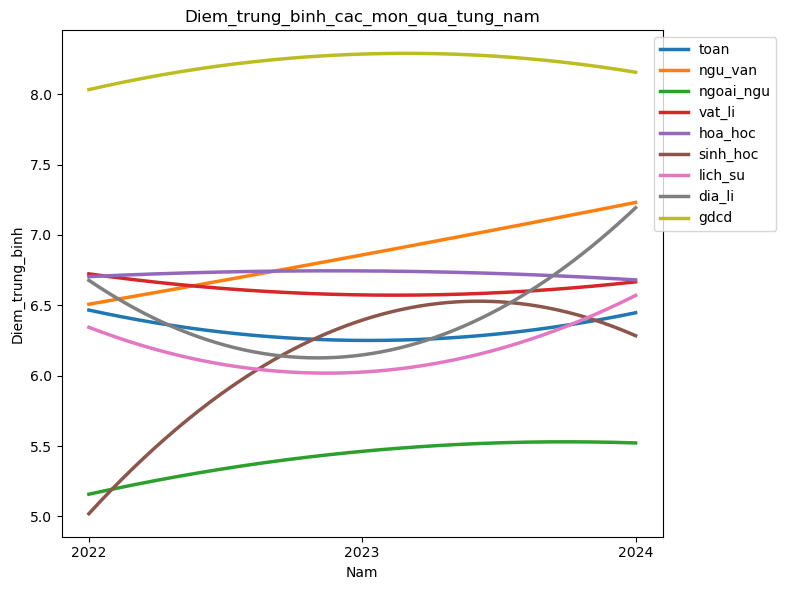

In [23]:
from scipy.interpolate import make_interp_spline
plt.figure(figsize=(8,6))
for i in subjects :
    x=mean_score_by_year['year']
    y=mean_score_by_year[i]
    
    x_new=np.linspace(x.min(),x.max(),300)
    spline_function = make_interp_spline(x, y, k=2)
    y_new=spline_function(x_new)
    plt.plot(
        x_new,
        y_new,
        label=i,
        linewidth=2.5,
        alpha=1
    )
plt.title('Diem_trung_binh_cac_mon_qua_tung_nam')
plt.xlabel('Nam')
plt.ylabel('Diem_trung_binh')
plt.xticks(x_year)
plt.legend(loc='upper right',bbox_to_anchor=(1.2,1))
plt.grid(False)
plt.tight_layout()
plt.show()

### Scores for each subject over the years

In [24]:
subjects=['toan','ngu_van','ngoai_ngu','vat_li','hoa_hoc','sinh_hoc','lich_su','dia_li']

In [25]:
x_year

[2022, 2023, 2024]

In [26]:
title=['Toán','Văn','Anh','Lí','Hóa','Sinh','Sử','Địa','CD']

In [ ]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#808080']
fig, axes =plt.subplots(3,8, figsize=(15,5))
for i, year in enumerate(x_year):
    for j,(subject,color) in enumerate(zip(subjects,colors)):
        sns.histplot(
            data[data.year==year][subject],
            ax=axes[i,j],
            bins=20,
            kde=False,
            edgecolor='black',
            color=color
        )
        axes[i,j].set_title(f'{title[j]} {year}')
        axes[i,j].set_xlabel(f'Diem {title[j]}')
        axes[i,j].set_ylabel('#')
plt.tight_layout()
plt.show()

### Subject

In [ ]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['toan'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='g'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Toán')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['toan'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()

In [ ]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['ngu_van'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='orange'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Văn')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['ngu_van'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()

In [ ]:
fig, axes=plt.subplots(3,1,figsize=(6,8))
for i,year in enumerate(x_year):
    sns.histplot(
        data[data.year==year]['vat_li'],
        ax=axes[i],
        bins=20,
        kde=False,
        edgecolor='black',
        color='y'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_Vật_lí')
    axes[i].set_ylabel('Số_lượng')
    
    year_data=data[data.year==year]['vat_li'].dropna()
    mean=year_data.mean()
    median=year_data.median()
    std=year_data.std()
    Q1=year_data.quantile(0.25)
    Q3=year_data.quantile(0.75)
    p85=year_data.quantile(0.85)
    p90=year_data.quantile(0.90)
    p95=year_data.quantile(0.95)
    p99=year_data.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.xticks(range(0,11,1))
plt.tight_layout()
plt.show()

### Compare with previous years

In [ ]:
data.info()

In [ ]:
sampled_data=data.sample(frac=0.3,random_state=1)

In [ ]:
sampled_data.head()

In [ ]:
sampled_data.info()

In [ ]:
x_year

In [ ]:
df_filtered=sampled_data

In [ ]:
df_filtered.year.unique()

In [ ]:
subjects

In [ ]:
colors = ['g', 'r', 'c']
for i in subjects:
    plt.figure(figsize=(10,3))
    for year,color in (zip(x_year,colors)):
        df1=df_filtered[df_filtered.year==year][i].dropna()
        sns.kdeplot(
            data=df1,
            label=f'Nam_{year}',
            color=color,
            bw_adjust=2
        )
    plt.title(f'Phân bố điểm {i} từ năm 2022 đến 2024')
    plt.xlabel('Điểm số')
    plt.ylabel('Mật độ')
    plt.xticks(range(0,11,1))
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

### Group distribution

In [ ]:
df_filtered.head(5)

In [ ]:
df_filtered['A']=df_filtered['toan']+df_filtered['vat_li']+df_filtered['hoa_hoc']
df_filtered['A1']=df_filtered['toan']+df_filtered['vat_li']+df_filtered['ngoai_ngu']
df_filtered['B']=df_filtered['toan']+df_filtered['sinh_hoc']+df_filtered['hoa_hoc']
df_filtered['D']=df_filtered['toan']+df_filtered['ngu_van']+df_filtered['ngoai_ngu']
df_filtered['C']=df_filtered['ngu_van']+df_filtered['lich_su']+df_filtered['dia_li']

In [ ]:
df_filtered.head(5)

In [ ]:
combinations=['A','A1','B','C','D']

In [ ]:
colors

In [ ]:
for i in combinations:
    plt.figure(figsize=(10,3))
    for year,color in (zip(x_year,colors)):
        df2=df_filtered[df_filtered.year==year][i].dropna()
        sns.kdeplot(
            data=df2,
            label=f'Nam_{year}',
            color=color,
            bw_adjust=2
        )
    plt.title(f'Phân bố điểm khối {i} từ năm 2022 đến 2024')
    plt.xlabel('Điểm số')
    plt.ylabel('Mật độ')
    plt.legend(title='Năm')
    plt.grid(False)
    plt.show()

In [ ]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['A'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='y'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_A')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_A=df_filtered[df_filtered.year==year]['A'].dropna()
    mean=df_A.mean()
    median=df_A.median()
    std=df_A.std()
    Q1=df_A.quantile(0.25)
    Q3=df_A.quantile(0.75)
    p85=df_A.quantile(0.85)
    p90=df_A.quantile(0.90)
    p95=df_A.quantile(0.95)
    p99=df_A.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['A1'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='c'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_A1')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_A1=df_filtered[df_filtered.year==year]['A1'].dropna()
    mean=df_A1.mean()
    median=df_A1.median()
    std=df_A1.std()
    Q1=df_A1.quantile(0.25)
    Q3=df_A1.quantile(0.75)
    p85=df_A1.quantile(0.85)
    p90=df_A1.quantile(0.90)
    p95=df_A1.quantile(0.95)
    p99=df_A1.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['B'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='b'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_B')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_B=df_filtered[df_filtered.year==year]['B'].dropna()
    mean=df_B.mean()
    median=df_B.median()
    std=df_B.std()
    Q1=df_B.quantile(0.25)
    Q3=df_B.quantile(0.75)
    p85=df_B.quantile(0.85)
    p90=df_B.quantile(0.90)
    p95=df_B.quantile(0.95)
    p99=df_B.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['C'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='orange'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_C')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_C=df_filtered[df_filtered.year==year]['C'].dropna()
    mean=df_C.mean()
    median=df_C.median()
    std=df_C.std()
    Q1=df_C.quantile(0.25)
    Q3=df_C.quantile(0.75)
    p85=df_C.quantile(0.85)
    p90=df_C.quantile(0.90)
    p95=df_C.quantile(0.95)
    p99=df_C.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes= plt.subplots(3,1, figsize=(8,5),sharex=True )

for i,year in enumerate(x_year):
    sns.histplot(
        data=df_filtered[df_filtered.year==year]['D'].dropna(),
        bins=30,
        ax=axes[i],
        kde=False,
        edgecolor='black',
        color='pink'
    )
    axes[i].set_title(f'{year}')
    axes[i].set_xlabel('Điểm_khối_D')
    axes[i].set_ylabel('Số_lượng')
    axes[i].set_xticks(range(0,31,1))
    
    df_D=df_filtered[df_filtered.year==year]['D'].dropna()
    mean=df_D.mean()
    median=df_D.median()
    std=df_D.std()
    Q1=df_D.quantile(0.25)
    Q3=df_D.quantile(0.75)
    p85=df_D.quantile(0.85)
    p90=df_D.quantile(0.90)
    p95=df_D.quantile(0.95)
    p99=df_D.quantile(0.99)
    
    text_str=(
        f'Mean= {mean:.2f}\nMedian= {median:.2f}\nSTD= {std:.2f}\n'
        f'Q1= {Q1:.2f}\nQ3= {Q3:.2f}\n'
        f'P85= {p85:.2f}\nP90= {p90:.2f}\nP95= {p95:.2f}\nP99= {p99:.2f}'
    )
    props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(1.05, 0.5, text_str, transform=axes[i].transAxes, fontsize=8.5,
                va='center', ha='left', bbox=props)
plt.tight_layout()
plt.show()

### Correlation

In [ ]:
df_2024=sampled_data[sampled_data.year==2024]

In [ ]:
subject_score_2024=df_2024[['toan',
 'ngu_van',
 'ngoai_ngu',
 'vat_li',
 'hoa_hoc',
 'sinh_hoc',
 'lich_su',
 'dia_li','gdcd']]

In [ ]:
corr_matrix=subject_score_2024.corr()
corr_matrix

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap='YlGn',
    fmt='.2f'
)
plt.title('Sự tương quan giữa các môn học năm 2024',loc='left',fontsize=15)
plt.show()

In [ ]:
df_filtered.head(5)

In [ ]:
df1_2024=df_filtered[df_filtered.year==2024]

In [ ]:
df1_2024.info()

In [ ]:
group_score=df1_2024[['A','A1','B','C','D']]

In [ ]:
corr_matrix2=group_score.corr()
corr_matrix2

In [ ]:
sns.heatmap(
    data=corr_matrix2,
    annot=True,
    cmap='YlGn',
    fmt='.2f'
)
plt.title('Sự tương quan giữa các khối thi năm 2024')
plt.show()

In [ ]:
x_year

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(12,6))
axes=axes.flatten()
for i,year in enumerate(x_year):
    df_year=df_filtered[df_filtered.year==year]
    group_score=df_year[['A','A1','B','C','D']]
    corr_mtr=group_score.corr()
    sns.heatmap(
    data=corr_mtr,
    annot=True,
    cmap='YlGn',
    fmt='.2f',
    ax=axes[i]
    )
    axes[i].set_title(f'Sự tương quan giữa các khối trong năm {year}')
plt.tight_layout()
plt.show()

In [ ]:
# Nguyen_Manh_Khang